___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
#Importing Necessary Packages
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from sklearn.metrics import roc_auc_score

SEED = 42
keras.utils.set_random_seed(SEED)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

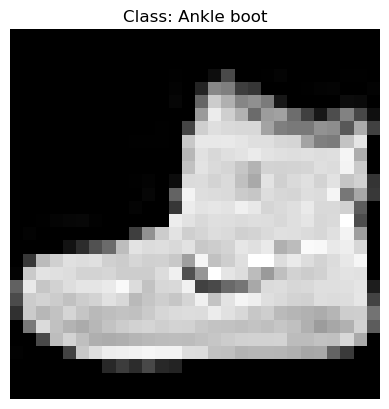

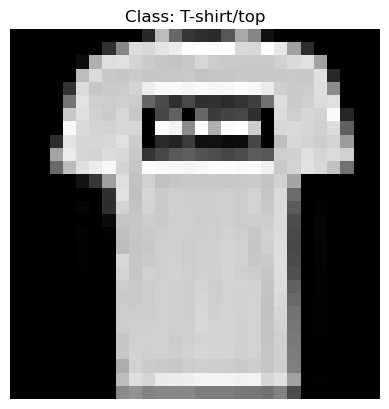

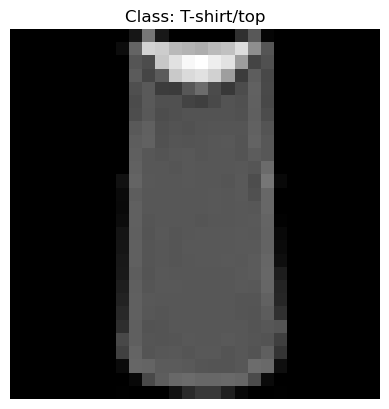

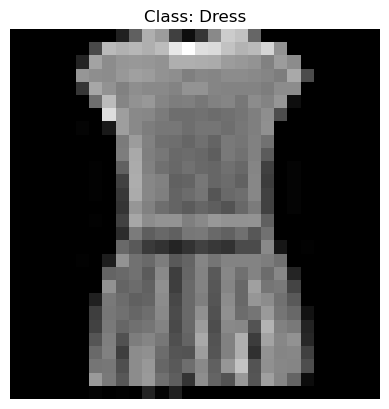

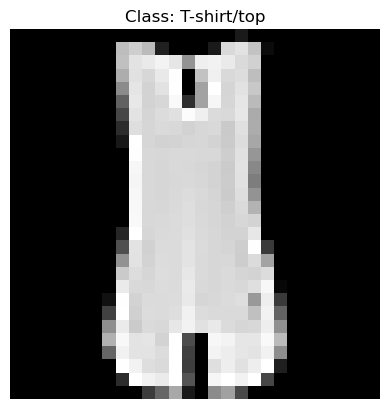

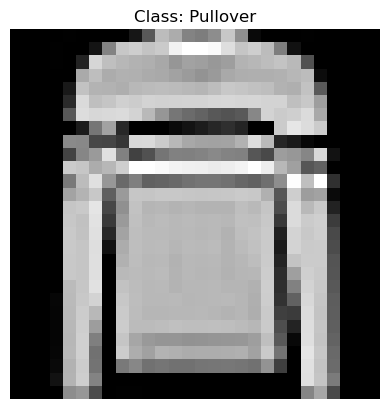

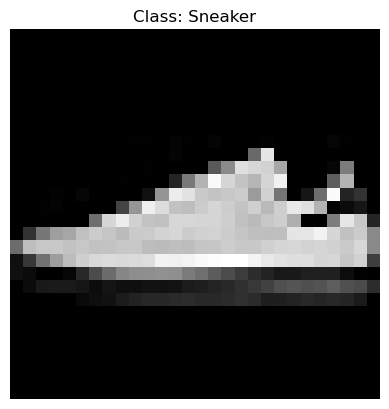

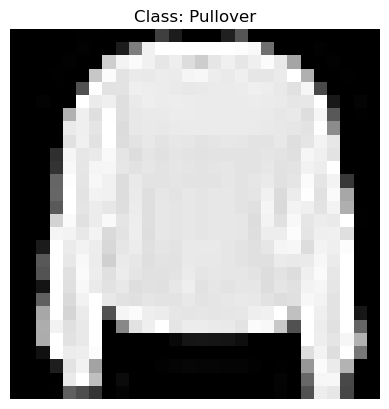

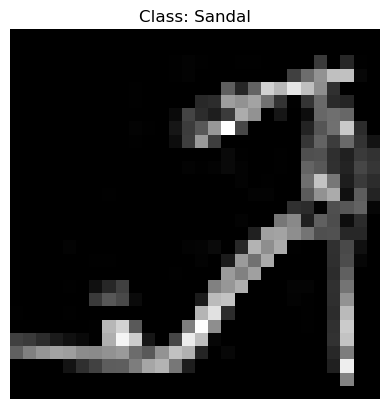

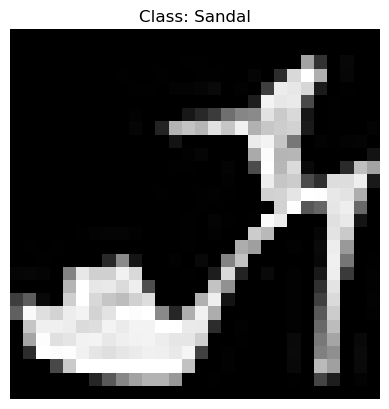

In [8]:
# Define the number of images you want to display (in this case, 10)
num_images_to_display = 10

# Iterate through the first 10 images and display them
for i in range(num_images_to_display):
    sample_image = x_train[i]
    sample_label = y_train[i]
    class_label = classes[sample_label]

    plt.figure()
    plt.imshow(sample_image, cmap='gray')  # Display the image in grayscale
    plt.title(f'Class: {class_label}')
    plt.axis('off')  # Turn off axis labels
    plt.show()

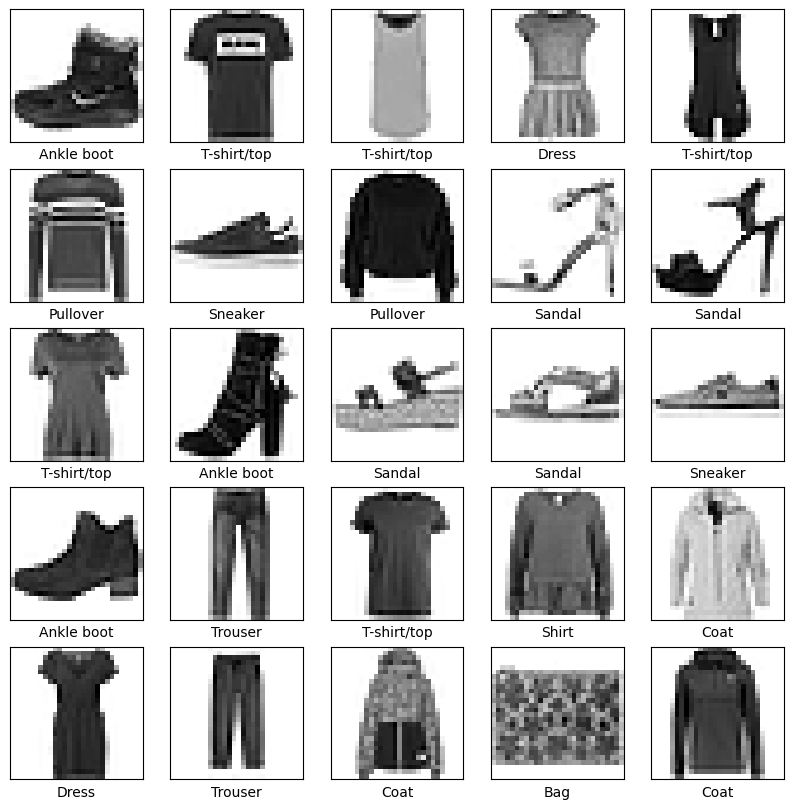

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [10]:
# Normalize the X train and X test data
x_train = x_train / 255.0
x_test = x_test / 255.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [11]:
# Reshape the X arrays for single-channel images
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
from tensorflow.keras.utils import to_categorical

# Number of classes
num_classes = 10

# Convert y_train and y_test to one-hot encoded format
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [13]:
y_train[0]

9

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# ---- Layer 1 ----
# 1. 2D Convolutional Layer
model.add(Conv2D(filters=28, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
# 2. Pooling 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
# 3. Flatten 
model.add(Flatten())
# 4. Dense Layer
model.add(Dense(128, activation='relu'))
# Final Dense Layer with softmax activation **output**
model.add(Dense(10, activation='softmax'))
# Compile the model (add optimizer, loss, and metrics)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21952)             0         
                                                                 
 dense (Dense)               (None, 128)               2809984   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2811554 (10.73 MB)
Trainable params: 2811554 (10.73 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True,mode="min")

In [18]:
model.fit(x_train,Y_train,batch_size=32,epochs=50,validation_data=(x_test, Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3694 - accuracy: 0.8689 - val_loss: 0.3184 - val_accuracy: 0.8862
Epoch 2/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2457 - accuracy: 0.9112 - val_loss: 0.2815 - val_accuracy: 0.8971
Epoch 3/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2047 - accuracy: 0.9253 - val_loss: 0.2640 - val_accuracy: 0.9073
Epoch 4/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1743 - accuracy: 0.9361 - val_loss: 0.2812 - val_accuracy: 0.9098
Epoch 5/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1510 - accuracy: 0.9455 - val_loss: 0.2819 - val_accuracy: 0.9111
Epoch 6/50
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1328 - accuracy: 0.9523 - val_loss: 0.2803 - val_accuracy: 0.9117
Epoch 7/50
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1181 - accuracy: 0.9576 - val_loss: 0.3139 -

**TASK 7: Plot values of metrics you used in your model.**

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
modelhistory=model.history.history
summary = pd.DataFrame(modelhistory)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.369411,0.868917,0.318395,0.8862
1,0.245745,0.911183,0.281493,0.8971
2,0.204714,0.925267,0.264030,0.9073
3,0.174283,0.936100,0.281190,0.9098
4,0.151006,0.945467,0.281889,0.9111
5,0.132804,0.952267,0.280334,0.9117
6,0.118128,0.957583,0.313921,0.9094
7,0.104670,0.963633,0.312011,0.9132
8,0.093646,0.966633,0.342332,0.9089
9,0.084491,0.970067,0.413495,0.9043


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

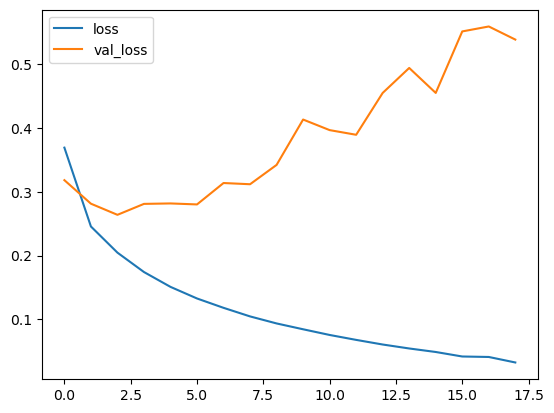

In [21]:
summary[["loss", "val_loss"]].plot()
plt.show()

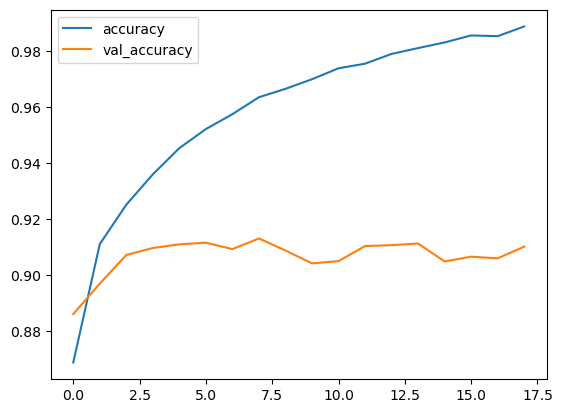

In [22]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 3ms/step


In [25]:
score = model.evaluate(x_train, Y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.1696380227804184
Train accuracy: 0.9390333294868469


In [26]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2640302777290344
Test accuracy: 0.9072999954223633


In [27]:
confusion_mtx

array([[841,   0,  19,  38,   3,   1,  94,   0,   4,   0],
       [  0, 972,   1,  20,   3,   0,   3,   0,   1,   0],
       [ 18,   1, 842,  12,  63,   0,  64,   0,   0,   0],
       [  9,   1,   7, 965,   5,   0,  13,   0,   0,   0],
       [  2,   1,  71,  54, 806,   0,  66,   0,   0,   0],
       [  0,   0,   0,   1,   0, 974,   0,  14,   1,  10],
       [ 80,   0,  62,  46,  47,   0, 760,   0,   5,   0],
       [  0,   0,   0,   0,   0,   5,   0, 958,   1,  36],
       [  3,   0,   4,   4,   0,   0,   6,   2, 981,   0],
       [  1,   0,   0,   0,   0,   6,   0,  19,   0, 974]], dtype=int64)

In [28]:
X_pred = model.predict(x_train)
X_pred_classes = np.argmax(X_pred, axis = 1)
X_true = np.argmax(Y_train, axis = 1)
confusion_mtx = confusion_matrix(X_true, X_pred_classes) 

1875/1875 [==============================] - 6s 3ms/step


In [29]:
print(classification_report(X_true, X_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6000
           1       1.00      0.99      0.99      6000
           2       0.90      0.89      0.89      6000
           3       0.88      0.99      0.93      6000
           4       0.92      0.85      0.88      6000
           5       1.00      0.99      0.99      6000
           6       0.83      0.85      0.84      6000
           7       0.98      0.97      0.98      6000
           8       1.00      0.99      1.00      6000
           9       0.97      0.99      0.98      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



In [30]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.85      0.96      0.90      1000
           4       0.87      0.81      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.76      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



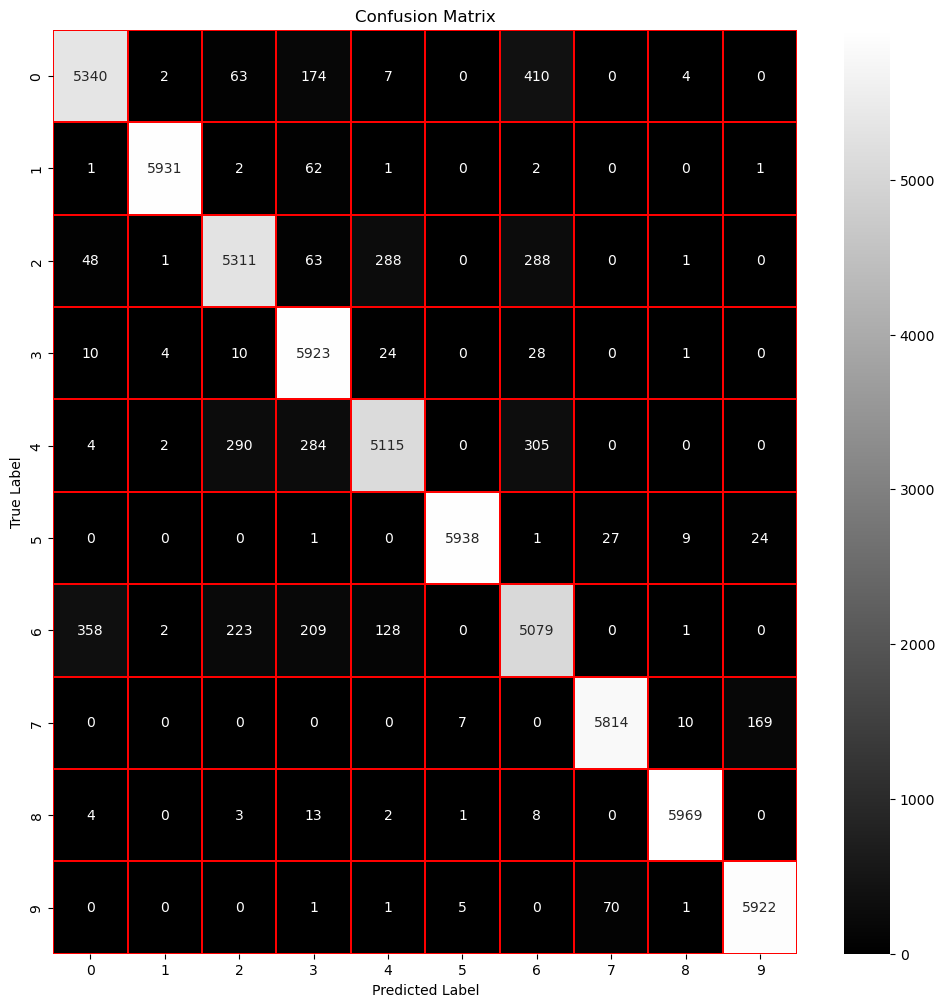

In [31]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="red", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
for i in range(len(confusion_mtx)):
    print("---------------------------------------------------------------------------------")
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]))
    print("Number of True Predicted: ",confusion_mtx[i][i] )
    print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
Class: 0
Number of Wrong Prediction: 660
Number of True Predicted:  5340
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Class: 1
Number of Wrong Prediction: 69
Number of True Predicted:  5931
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Class: 2
Number of Wrong Prediction: 689
Number of True Predicted:  5311
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Class: 3
Number of Wrong Prediction: 77
Number of True Predicted:  5923
---------------------------------------------------------------------------------
------------------------------------------------------

## Prediction

In [33]:
my_image = x_test[90]

In [34]:
my_image.shape

(28, 28, 1)

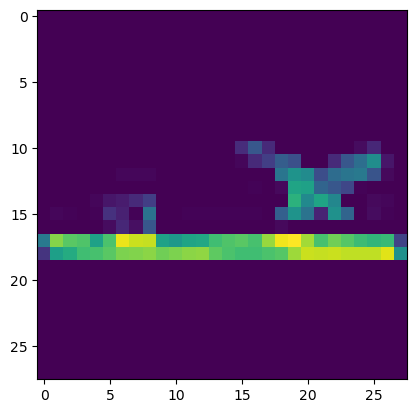

In [35]:
plt.imshow(my_image)
plt.show()

In [36]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 15ms/step


In [37]:
image_prediction

array([[2.2528388e-06, 1.0752653e-09, 6.3085126e-06, 6.9228321e-08,
        4.5813606e-09, 9.9987149e-01, 1.1290872e-06, 8.4253923e-05,
        3.4072971e-05, 4.5982566e-07]], dtype=float32)

In [38]:
result = np.argmax(image_prediction, axis=1)
result

array([5], dtype=int64)

In [39]:
y_test[90]

5

In [40]:
my_image = x_test[44]

In [41]:
my_image.shape

(28, 28, 1)

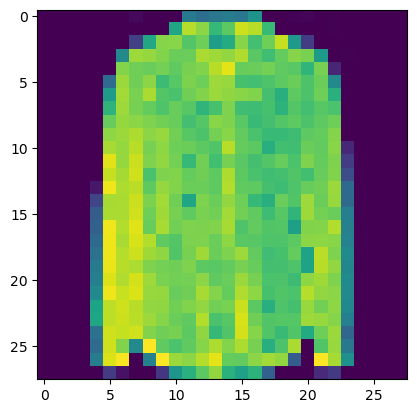

In [42]:
plt.imshow(my_image)
plt.show()

In [43]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 15ms/step


In [44]:
image_prediction

array([[1.2099992e-04, 5.8857146e-09, 2.7859379e-03, 2.4742076e-06,
        3.5356299e-03, 1.7063688e-06, 9.9353725e-01, 3.8258050e-09,
        1.1215294e-05, 4.7714707e-06]], dtype=float32)

In [45]:
result = np.argmax(image_prediction, axis=1)
result

array([6], dtype=int64)

In [46]:
y_test[44]

6

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___